In [1]:
# Imports
from Code.h5Constructor import h5Constructor
import cProfile

In [2]:
#gc = h5Constructor('./Dataset/CIFs/Simulated/', './Dataset/h5/Simulated/')
# cProfile.run('gc.gen_h5s(parallelize=False, device="cuda")', sort='tottime')
#gc.gen_h5s(parallelize=False, device='cuda')

Save directory doesn't exist.
Created the save directory at Dataset/h5/Simulated

Constructing graphs from cif files:


0it [00:00, ?it/s]

In [9]:
from mendeleev import element
from mendeleev.fetch import fetch_table
element('Zn').electron_affinity

In [13]:
affinity_list = fetch_table('elements')[['symbol', 'electron_affinity']]

In [14]:
affinity_list[affinity_list['electron_affinity'].isnull()]

,symbol,electron_affinity
9,Ne,NaN
11,Mg,NaN
24,Mn,NaN
29,Zn,NaN
35,Kr,NaN
47,Cd,NaN
60,Pm,NaN
61,Sm,NaN
63,Gd,NaN
66,Ho,NaN


In [2]:
from Code.datasetClass import InOrgMatDatasets
from pathlib import Path

test = InOrgMatDatasets('Simulated', root='./Dataset/')

In [3]:
test.create_data_split()
test.create_data_split(split_strategy='stratified', stratify_on='Crystal type')

/home/ufj/anaconda3/envs/dataset_env/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/ufj/anaconda3/envs/dataset_env/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [4]:
test.load_data_split(split_strategy='stratified', stratify_on='Crystal type')

In [5]:
test.get(1)

Data(
  x=[4, 4],
  edge_index=[2, 6],
  edge_attr=[12],
  y={
    crystal_type='ReO3',
    space_group_symbol='P m -3 m',
    space_group_number=221,
    atomic_species=[2],
    n_atomic_species=2,
    cell_params=[6],
    np_size=22.39316749572754,
    nd=[2, 290],
    xrd=[2, 290],
    nPDF=[2, 5500],
    xPDF=[2, 5500],
    sans=[2, 300],
    saxs=[2, 300]
  },
  pos=[4, 3],
  pos_real=[4, 3]
)

In [6]:
test.get(1, split='test')

Data(
  x=[4, 4],
  edge_index=[2, 8],
  edge_attr=[8],
  y={
    crystal_type='Wurtzite',
    space_group_symbol='C m c 21',
    space_group_number=36,
    atomic_species=[2],
    n_atomic_species=2,
    cell_params=[6],
    np_size=53.47060775756836,
    nd=[2, 290],
    xrd=[2, 290],
    nPDF=[2, 5500],
    xPDF=[2, 5500],
    sans=[2, 300],
    saxs=[2, 300]
  },
  pos=[4, 3],
  pos_real=[4, 3]
)

In [7]:
stats = test.get_statistics(return_dataframe=True)
stats.head()

,idx,# of nodes,# of edges,# of elements,Space group (Symbol),Space group (Number),Crystal type,NP size (Å),Elements,Random data split,Stratified data split (Crystal type)
0,0,4.0,6.0,2.0,P m -3 m,221.0,ReO3,11.694450,"[tensor(8.), tensor(44.)]",Test,Train
1,1,4.0,6.0,2.0,P m -3 m,221.0,ReO3,22.393167,"[tensor(8.), tensor(44.)]",Train,Test
2,2,4.0,6.0,2.0,P m -3 m,221.0,ReO3,32.380466,"[tensor(8.), tensor(44.)]",Train,Validation
3,3,4.0,6.0,2.0,P m -3 m,221.0,ReO3,43.582642,"[tensor(8.), tensor(44.)]",Train,Test
4,4,4.0,6.0,2.0,P m -3 m,221.0,ReO3,53.590706,"[tensor(8.), tensor(44.)]",Train,Train


In [8]:
stats.describe()

,# of nodes,# of edges,# of elements,Space group (Number),NP size (Å)
count,3240.000000,3240.000000,3240.0,3240.000000,3240.000000
mean,10.666667,41.296296,2.0,151.583333,33.752255
std,14.039815,67.983425,0.0,89.484903,14.709333
min,2.000000,0.000000,2.0,12.000000,9.429051
25%,4.000000,6.000000,2.0,56.250000,22.612006
50%,7.000000,14.000000,2.0,218.500000,33.602766
75%,9.750000,40.000000,2.0,225.000000,44.315773
max,56.000000,256.000000,2.0,227.000000,58.776638


In [9]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

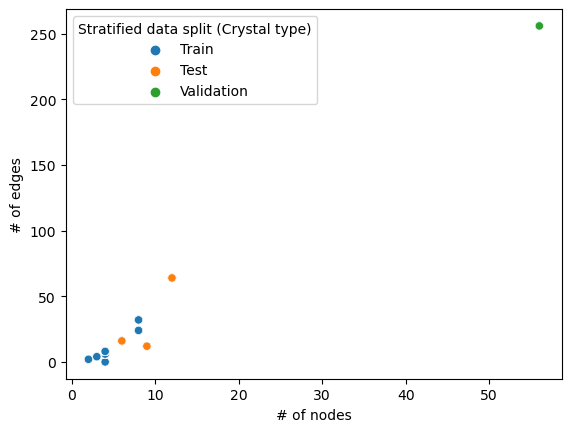

In [10]:
sns.scatterplot(data=stats, x='# of nodes', y='# of edges', hue='Stratified data split (Crystal type)')
plt.show()

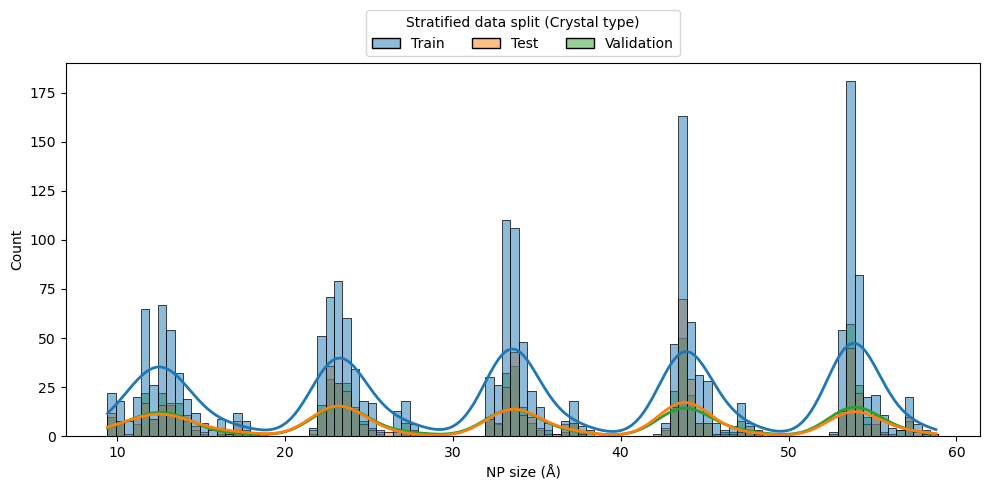

In [11]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=stats, x='NP size (Å)', binwidth=0.5, hue='Stratified data split (Crystal type)', multiple='layer',kde=True, kde_kws=dict(bw_method=0.1), line_kws=dict(linewidth=2), stat='count')
sns.move_legend(ax, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.tight_layout()
plt.savefig('./test_stats_sizeDist.png', format='png', dpi=300)
plt.show()

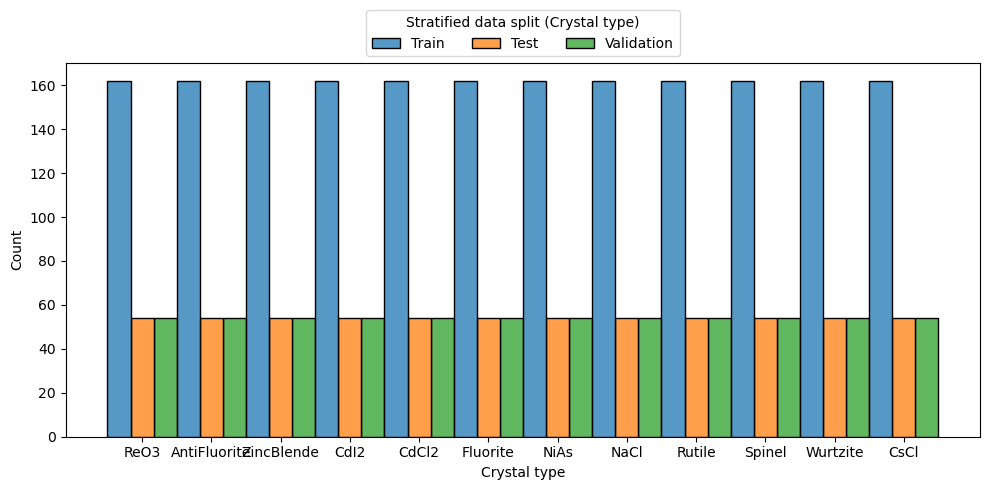

In [13]:
plt.figure(figsize=(10,5))
#ax = sns.histplot(data=stats, x='Crystal type', hue='Random data split', multiple='dodge')
ax = sns.histplot(data=stats, x='Crystal type', hue='Stratified data split (Crystal type)', multiple='dodge')
sns.move_legend(ax, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.tight_layout()
plt.savefig('./test_stats_crystalTypes.png', format='png', dpi=300)
plt.show()

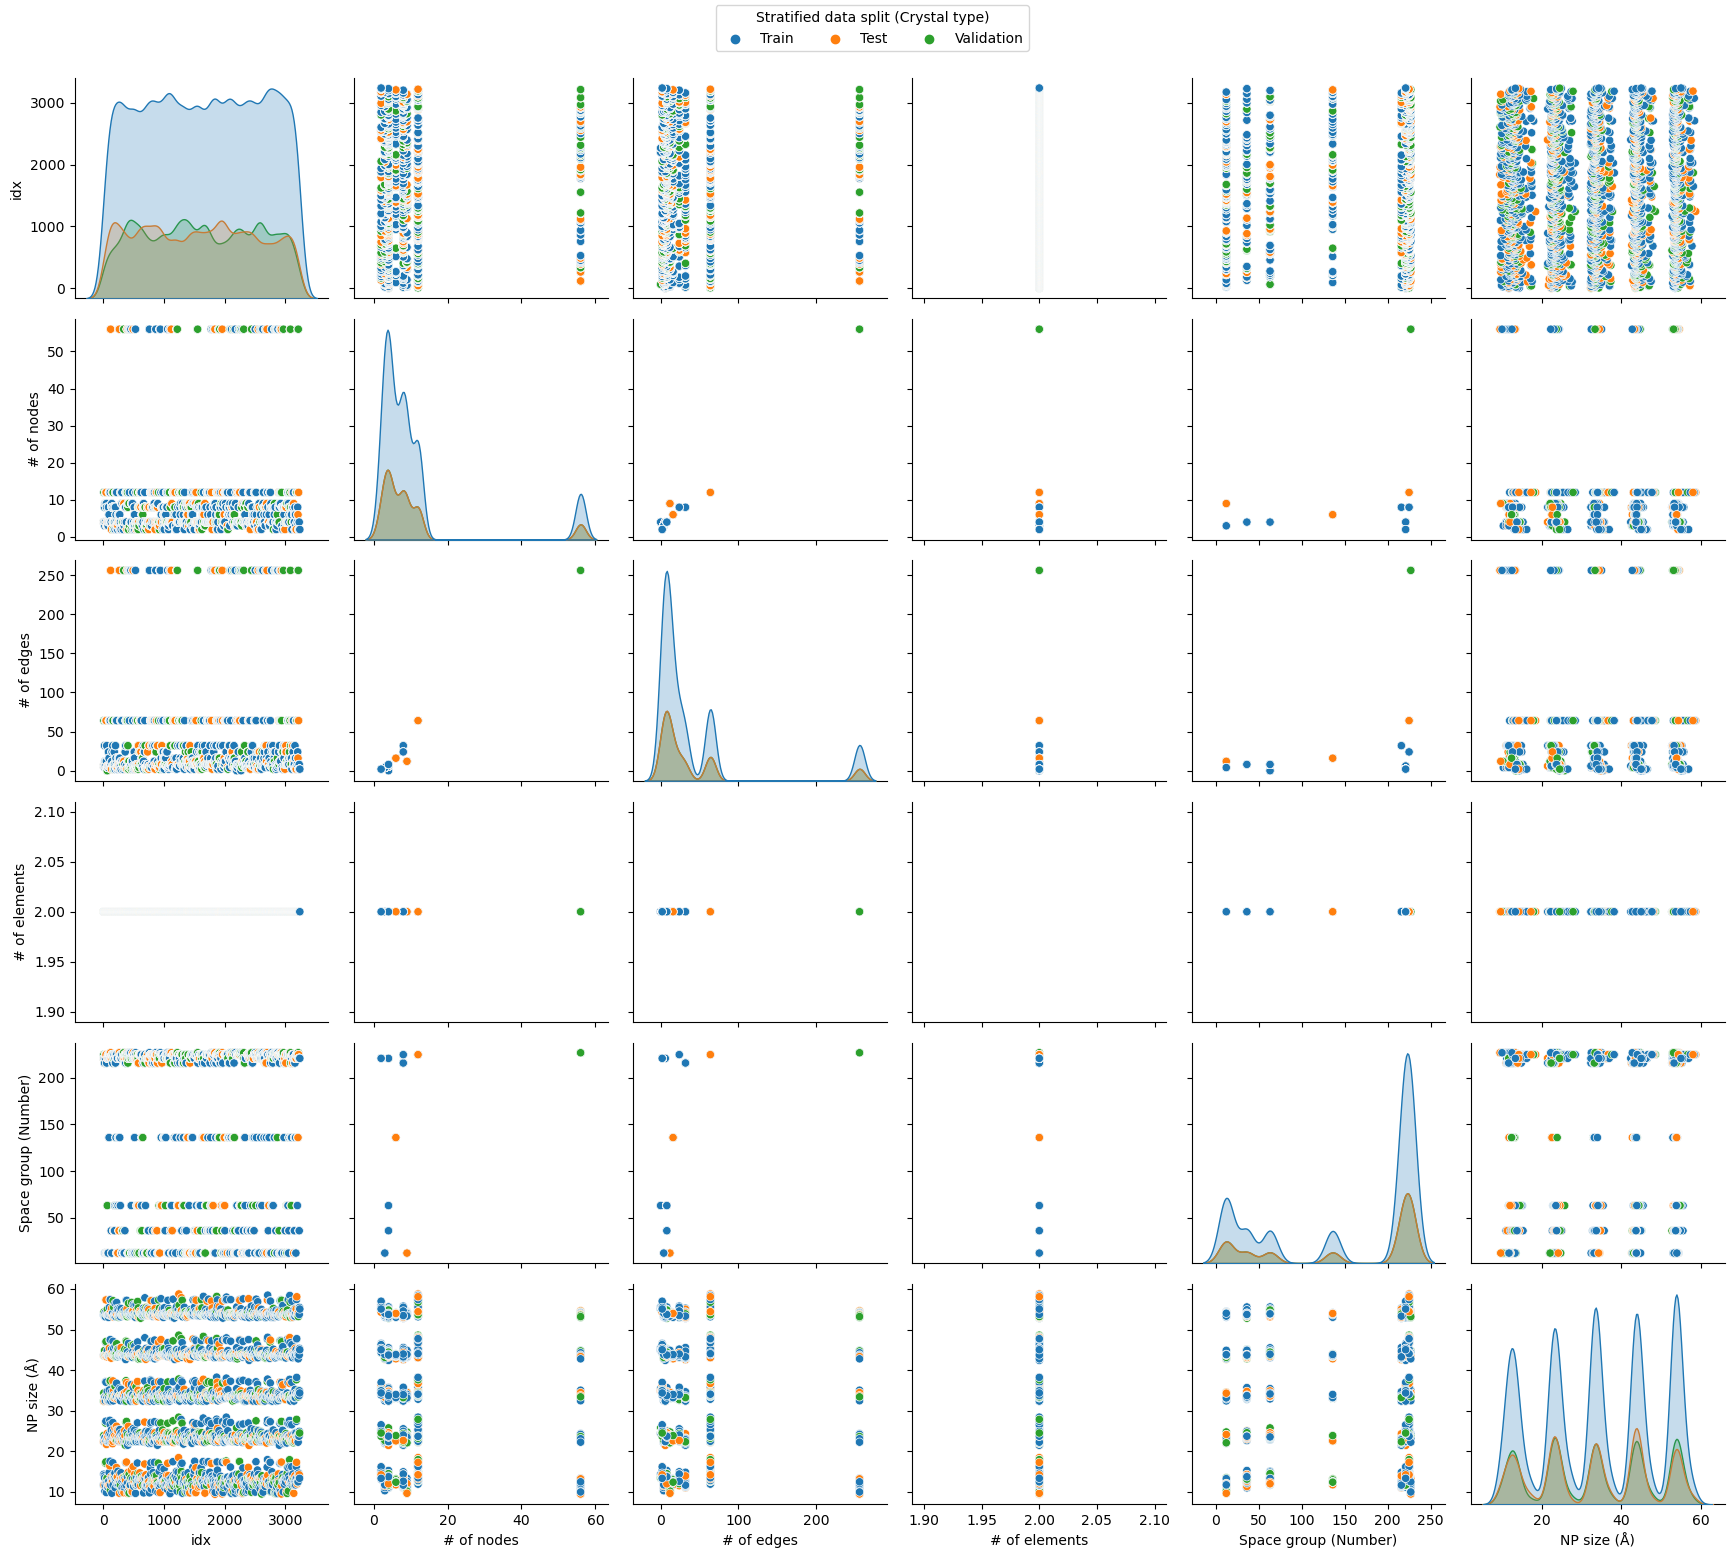

In [14]:
#ax = sns.pairplot(data=stats, hue='Random data split', diag_kws=dict(bw_method=0.1))
ax = sns.pairplot(data=stats, hue='Stratified data split (Crystal type)', diag_kws=dict(bw_method=0.1))
sns.move_legend(ax, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.tight_layout()
plt.savefig('./test_stats_pairplot.png', format='png', dpi=300)
plt.show()

In [13]:
stats.columns

Index(['idx', '# of nodes', '# of edges', '# of elements',
       'Space group (Symbol)', 'Space group (Number)', 'Crystal type',
       'NP size (Å)', 'Elements', 'Random data split',
       'Stratified data split (Crystal type)'],
      dtype='object')

In [13]:
#import Code.cifCleaning as cc
#import pandas as pd

#df = cc.cif_cleaning_pipeline('./Dataset/CIFs/ICSD_MonoMetalOxides/', remove_duplicates=True, unwanted_atoms=None, chunksize=1000)